In [3]:
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
#from uszipcode import SearchEngine
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy.exc import GeocoderTimedOut

In [4]:
df=pd.read_csv('telco_churn_data.csv')

In [5]:
num_samples,num_features=df.shape
print(f"Number of Features: {num_features}\nNumber of Samples: {num_samples}")

Number of Features: 46
Number of Samples: 7043


In [79]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [80]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


In [81]:
df.dtypes

,0
Customer ID,object
Referred a Friend,object
Number of Referrals,int64
Tenure in Months,int64
Offer,object
Phone Service,object
Avg Monthly Long Distance Charges,float64
Multiple Lines,object
Internet Service,object
Internet Type,object


In [6]:
df.isnull().sum()

,0
Customer ID,0
Referred a Friend,0
Number of Referrals,0
Tenure in Months,0
Offer,3877
Phone Service,0
Avg Monthly Long Distance Charges,0
Multiple Lines,0
Internet Service,0
Internet Type,1526


In [7]:
df.select_dtypes(include='object').nunique()

,0
Customer ID,7043
Referred a Friend,2
Offer,5
Phone Service,2
Multiple Lines,2
Internet Service,2
Internet Type,3
Online Security,2
Online Backup,2
Device Protection Plan,2


In [8]:
df.drop(columns=['Churn Category','Churn Reason','Customer ID','Customer Satisfaction','Offer'],inplace=True)

In [9]:
df['Internet Type'].unique()

array(['Fiber Optic', 'Cable', 'DSL', nan], dtype=object)

In [10]:
null_internet_type_df = df[df['Internet Type'].isnull()][['Internet Service']]
print(null_internet_type_df.nunique())
print(len(null_internet_type_df))
#This tells us that the NaN values for internet type relate to people without internet service

Internet Service    1
dtype: int64
1526


In [11]:
df['Internet Type'].fillna('Not Applicable', inplace=True)
df['Internet Type'].unique()

<ipython-input-11-edfa9d15ba67>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Internet Type'].fillna('Not Applicable', inplace=True)


array(['Fiber Optic', 'Cable', 'DSL', 'Not Applicable'], dtype=object)

In [12]:
df.isnull().sum() #No more missing values

,0
Referred a Friend,0
Number of Referrals,0
Tenure in Months,0
Phone Service,0
Avg Monthly Long Distance Charges,0
Multiple Lines,0
Internet Service,0
Internet Type,0
Avg Monthly GB Download,0
Online Security,0


In [13]:
positive_churn=df['Churn Value'].sum()
negative_churn=len(df['Churn Value'])-positive_churn
print(f'Churn Count: {positive_churn}\nNon-Churn Count: {negative_churn}')
#fairly imbalanced set

Churn Count: 1869
Non-Churn Count: 5174


In [14]:
'''
We are identifying columns with only two unique values and then printing said values so we can map to 1,0 if needed
'''
binary_cols = df.select_dtypes(include='object').nunique()
binary_cols = binary_cols[binary_cols == 2].index

for col in binary_cols:
    print(f"Column: {col}",df[col].unique())
#map yes/no and male/female to 1 and 0 respectively

Column: Referred a Friend ['No' 'Yes']
Column: Phone Service ['No' 'Yes']
Column: Multiple Lines ['No' 'Yes']
Column: Internet Service ['Yes' 'No']
Column: Online Security ['No' 'Yes']
Column: Online Backup ['No' 'Yes']
Column: Device Protection Plan ['Yes' 'No']
Column: Premium Tech Support ['No' 'Yes']
Column: Streaming TV ['No' 'Yes']
Column: Streaming Movies ['Yes' 'No']
Column: Streaming Music ['No' 'Yes']
Column: Unlimited Data ['No' 'Yes']
Column: Paperless Billing ['Yes' 'No']
Column: Gender ['Male' 'Female']
Column: Under 30 ['No' 'Yes']
Column: Senior Citizen ['Yes' 'No']
Column: Married ['No' 'Yes']
Column: Dependents ['No' 'Yes']


In [15]:
for col in binary_cols:
    df[col].replace({'Yes':1,'No':0},inplace=True)
df["Gender"].replace({'Female':0,'Male':1},inplace=True)

<ipython-input-15-58f5f66d383b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'Yes':1,'No':0},inplace=True)
<ipython-input-15-58f5f66d383b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace({'Yes':1,'No':0},inplace=True)
<ipython-input-15-58f5f66d383b>:3: FutureWar

In [16]:
#verify
for col in binary_cols:
    print(f"Column: {col}",df[col].unique())

Column: Referred a Friend [0 1]
Column: Phone Service [0 1]
Column: Multiple Lines [0 1]
Column: Internet Service [1 0]
Column: Online Security [0 1]
Column: Online Backup [0 1]
Column: Device Protection Plan [1 0]
Column: Premium Tech Support [0 1]
Column: Streaming TV [0 1]
Column: Streaming Movies [1 0]
Column: Streaming Music [0 1]
Column: Unlimited Data [0 1]
Column: Paperless Billing [1 0]
Column: Gender [1 0]
Column: Under 30 [0 1]
Column: Senior Citizen [1 0]
Column: Married [0 1]
Column: Dependents [0 1]


In [17]:
'''
uszipcode package is having errors - attempting to use long/latt with geopy instead of zipcode
https://www.geeksforgeeks.org/get-the-city-state-and-country-names-from-latitude-and-longitude-using-python/
'''
#Running a test:
geolocator= Nominatim(user_agent="my_geopy_app")
location= geolocator.reverse(str(df['Latitude'][0])+","+str(df['Longitude'][0]))
print(location.address)
address= location.raw['address']
print(address)
#Lets try to take the suburb and county

582, South Atlantic Boulevard, Eastmont, East Los Angeles, Los Angeles County, California, 90022, United States
{'house_number': '582', 'road': 'South Atlantic Boulevard', 'hamlet': 'Eastmont', 'suburb': 'East Los Angeles', 'county': 'Los Angeles County', 'state': 'California', 'ISO3166-2-lvl4': 'US-CA', 'postcode': '90022', 'country': 'United States', 'country_code': 'us'}


In [ ]:
'''
#Leaving as sample - as suspected we are likely restricted by the number of queries we can send as free users
geolocator = Nominatim(user_agent="my_geopy_app") #initialized user agent
#Apply a function that effectively utilizes our above test approach via geopy to our dataframe
#Implementing a lambda function on the dataframe

def get_loccyloc(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        if location:
            address= location.raw.get('address')
            suburb=  address.get('suburb')
            county= address.get('county')
            #get back a series
            return pd.Series([suburb, county])
        else:
            print("location not found")
            return pd.Series([None, None])#flag for error
    except:
        print("Error getting location - likely timeout")
df[['Suburb','County']] = df.apply(lambda row: get_loccyloc(row['Latitude'], row['Longitude']), axis=1)

print(df[['Latitude','Longitude', 'Suburb','County']].head())

'''


Error getting location - likely timeout


Error getting location - likely timeout
Error getting location - likely timeout


Error getting location - likely timeout


In [1]:
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.5 MB/s eta 0:00:00


In [9]:
!pip uninstall -y sqlalchemy-mate uszipcode
!pip install sqlalchemy-mate==1.4.28.4 uszipcode #I lowkey guessed a version lmao crossing fingers

  Using cached uszipcode-1.0.1-py2.py3-none-any.whl.metadata (8.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 2.2 MB/s eta 0:00:00
Using cached uszipcode-1.0.1-py2.py3-none-any.whl (35 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.6 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.38
    Uninstalling SQLAlchemy-2.0.38:
      Successfully uninstalled SQLAlchemy-2.0.38
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.


In [2]:
from uszipcode import SearchEngine


In [18]:
search = SearchEngine()
def get_county_by_zip(zip_code):
    result = search.by_zipcode(zip_code)
    return result.county if result else None
df['County']=df['Zip Code'].apply(get_county_by_zip)
print(df['County'].nunique()) #58 unique counties - reasonable for 7000+ samples

58


In [20]:
df['County'].unique()

array(['Los Angeles County', 'Orange County', 'San Bernardino County',
       'San Diego County', 'Riverside County', 'Santa Barbara County',
       'Tulare County', 'Kern County', 'Fresno County', 'Monterey County',
       'San Francisco County', 'Santa Clara County', 'Solano County',
       'Contra Costa County', 'Alameda County', 'Napa County',
       'Marin County', 'Santa Cruz County', 'Calaveras County',
       'Tuolumne County', 'Sonoma County', 'Lake County',
       'Humboldt County', 'Yolo County', 'Sacramento County',
       'Sutter County', 'Placer County', 'Yuba County', 'Plumas County',
       'Butte County', 'Nevada County', 'Trinity County', 'Shasta County',
       'Ventura County', 'San Luis Obispo County', 'Mono County',
       'Merced County', 'San Mateo County', 'San Joaquin County',
       'Mariposa County', 'Stanislaus County', 'Mendocino County',
       'Del Norte County', 'Glenn County', 'Modoc County',
       'Tehama County', 'Lassen County', 'Sierra County',
  

In [22]:
df.drop(columns=["Zip Code","Longitude", "Latitude"],inplace=True)

In [27]:
df.dtypes

,0
Referred a Friend,int64
Number of Referrals,int64
Tenure in Months,int64
Phone Service,int64
Avg Monthly Long Distance Charges,float64
Multiple Lines,int64
Internet Service,int64
Internet Type,object
Avg Monthly GB Download,int64
Online Security,int64


In [28]:
df.nunique()

,0
Referred a Friend,2
Number of Referrals,12
Tenure in Months,72
Phone Service,2
Avg Monthly Long Distance Charges,3584
Multiple Lines,2
Internet Service,2
Internet Type,4
Avg Monthly GB Download,63
Online Security,2


In [30]:
continuous_variables = ["Number of Referrals","Tenure in Months","Avg Monthly Long Distance Charges","Avg Monthly GB Download","Monthly Charge","Total Regular Charges","Total Refunds","Total Extra Data Charges","Total Long Distance Charges","Age","Population","CLTV","Total Customer Svc Requests","Product/Service Issues Reported","Number of Dependents"]
categorical_variables = ["Referred a Friend","Phone Service","Multiple Lines","Internet Service","Internet Type","Online Security","Online Backup","Device Protection Plan","Premium Tech Support","Streaming TV","Streaming Movies","Streaming Music","Unlimited Data","Contract","Paperless Billing","Payment Method","Gender","Under 30","Senior Citizen","Married","Dependents","City","Churn Value","County"]

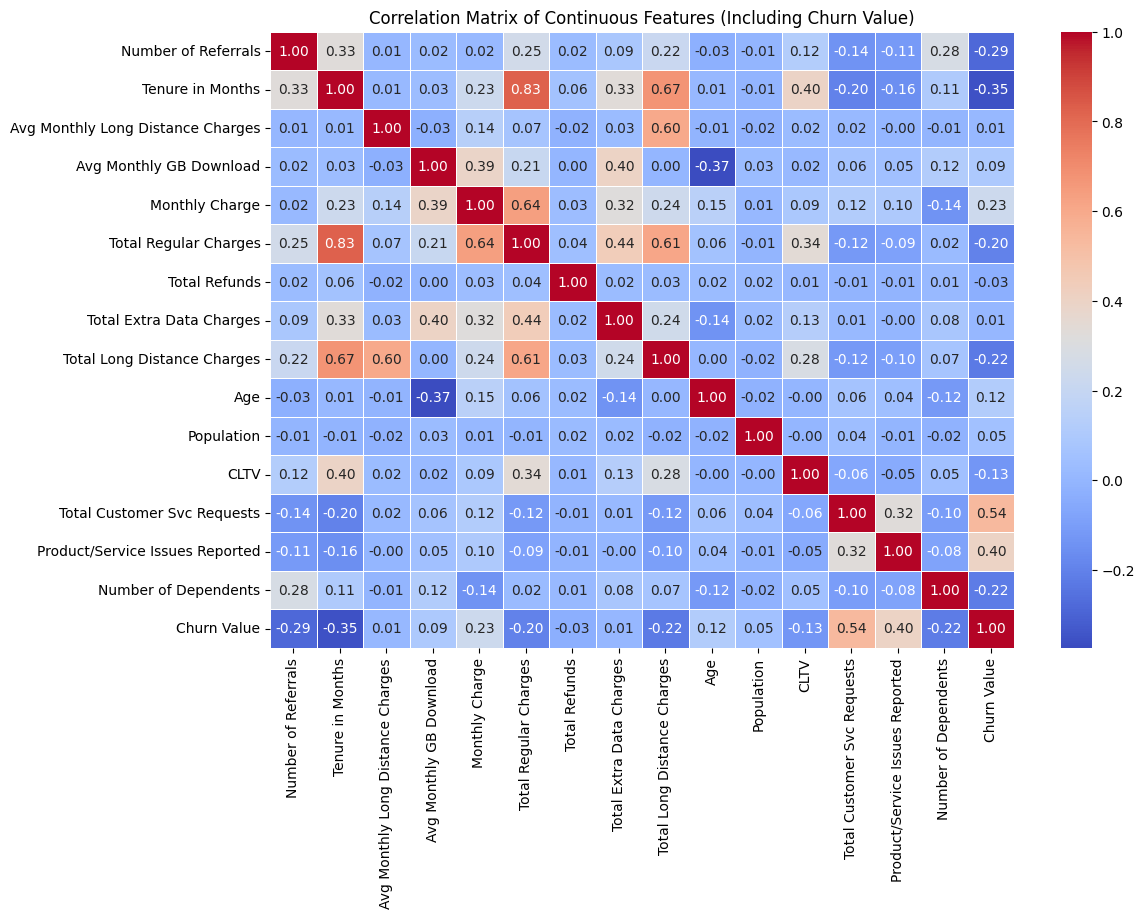

In [31]:
#Computing correlation matrix for continous variables and the binary churn value (target)
corr_matrix = df[continuous_variables + ["Churn Value"]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Continuous Features (Including Churn Value)")
plt.show()
#Should include some of the binary categorical features?

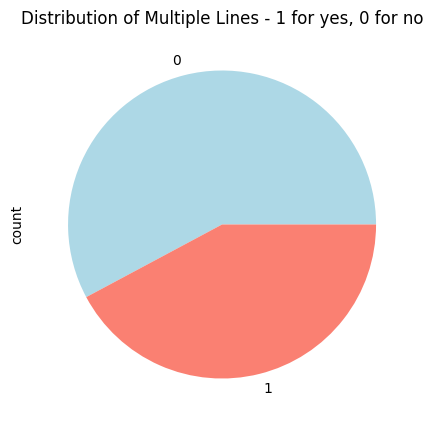

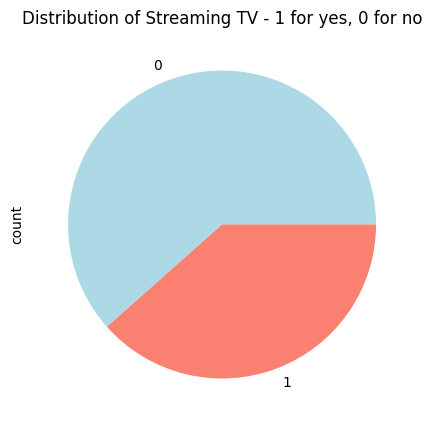

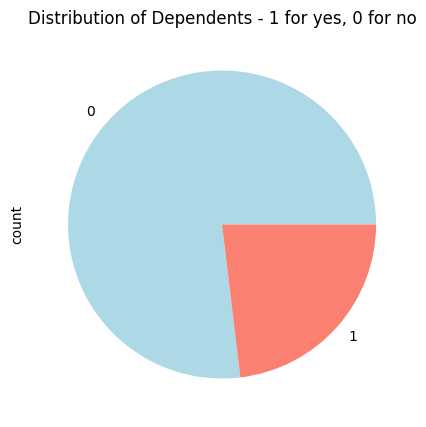

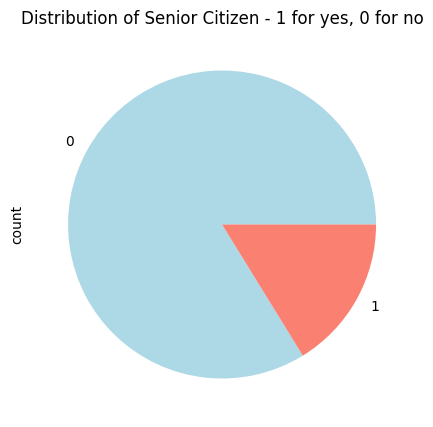

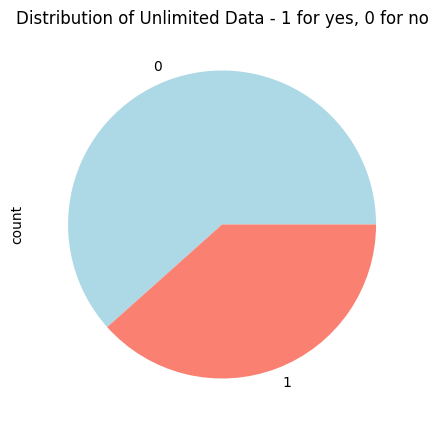

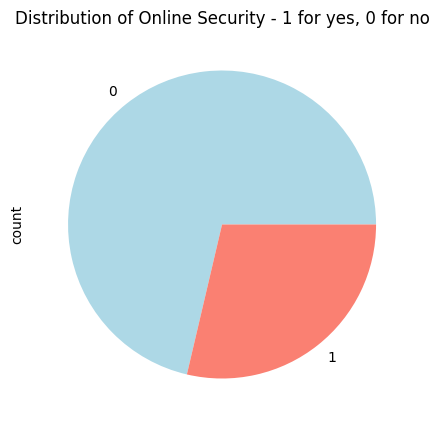

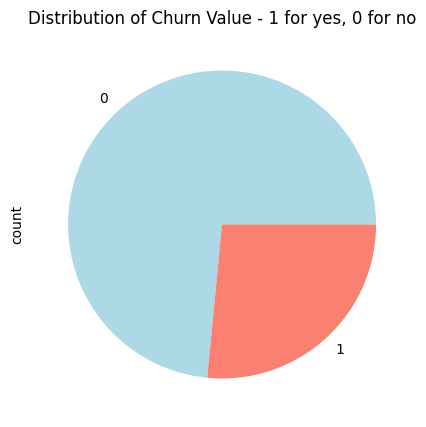

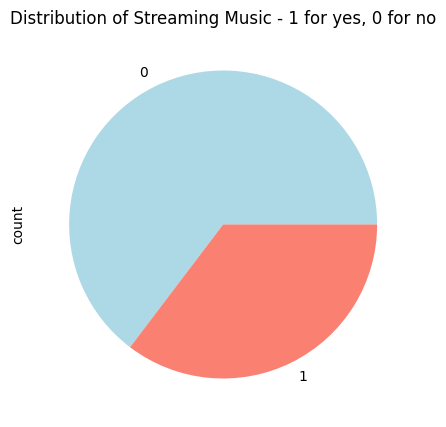

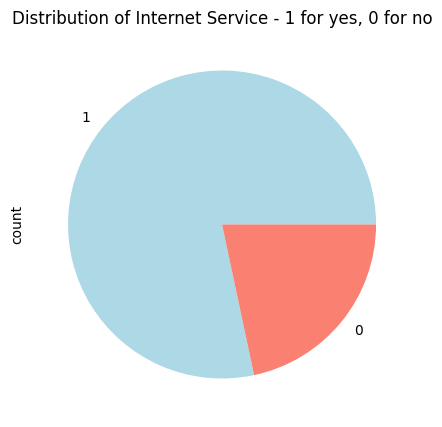

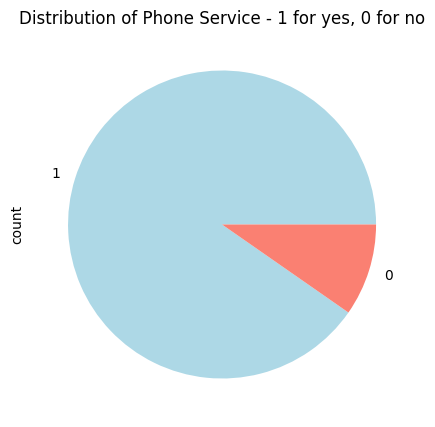

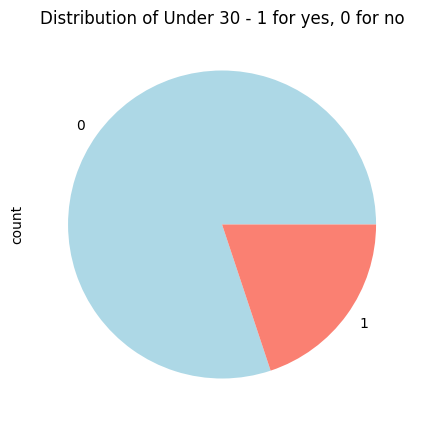

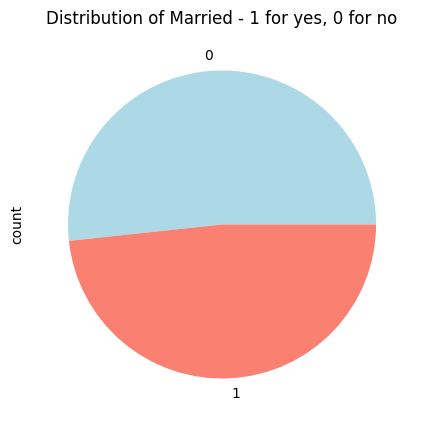

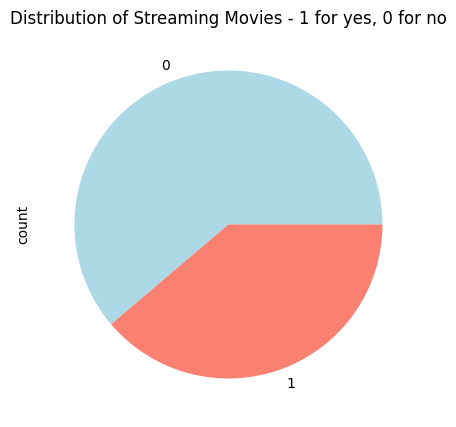

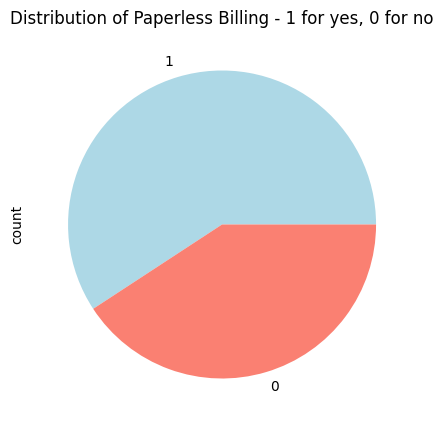

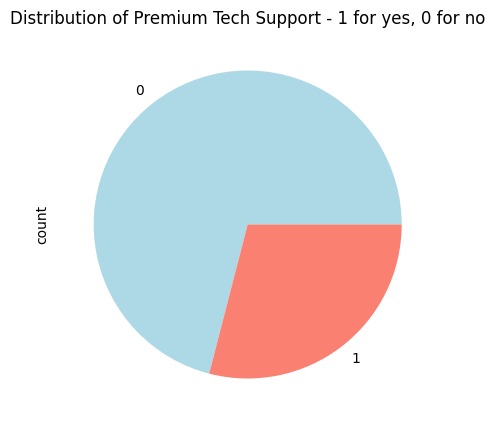

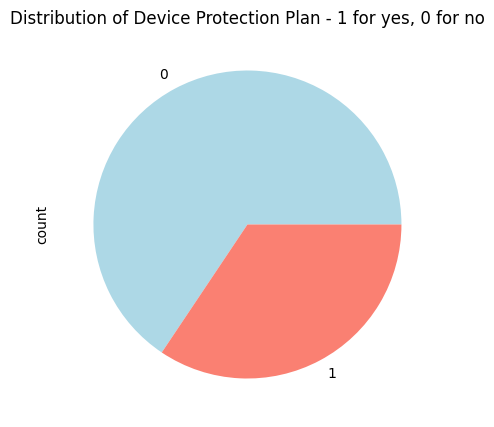

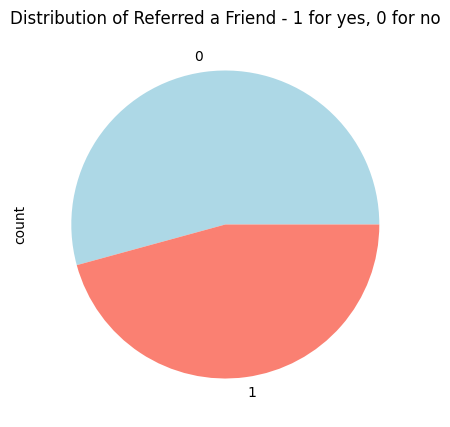

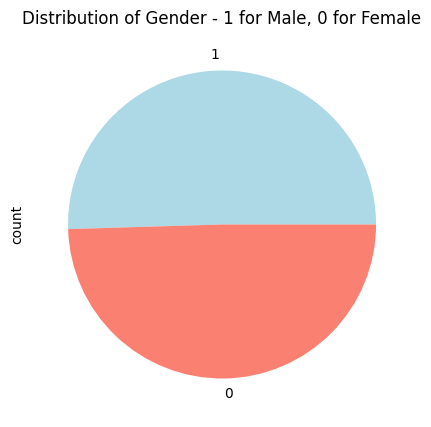

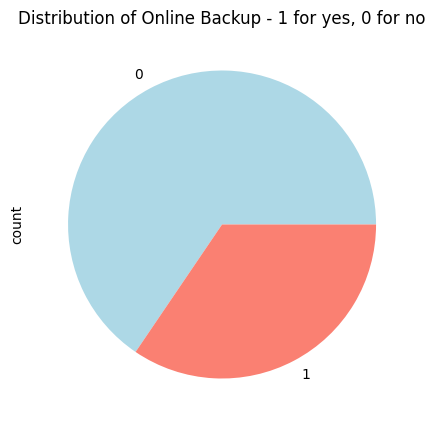

In [42]:
bf=binary_cols.copy()
bf=list(bf)
bf.append("Churn Value")
bf.append("Gender")
bf=set(bf)#lazy coding, don't worry about it
#pie plots for each of the target features
for feature in bf:
    plt.figure(figsize=(5, 5))
    df[feature].value_counts().plot.pie(colors=["lightblue", "salmon"])
    if feature!="Gender":
        plt.title(f"Distribution of {feature} - 1 for yes, 0 for no")
    else:
        plt.title(f"Distribution of {feature} - 1 for Male, 0 for Female")

    plt.show()
